In [30]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import seaborn as sns
color= sns.color_palette()
from scipy import sparse
%matplotlib inline

In [24]:
train_df= pd.read_json("/users/krutarthmajithia/downloads/train.json")
test_df = pd.read_json('/users/krutarthmajithia/downloads/test.json')

In [3]:
train_df.head(10)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


In [4]:
train_df.shape


(49352, 15)

In [5]:
int_level=train_df['interest_level'].value_counts()

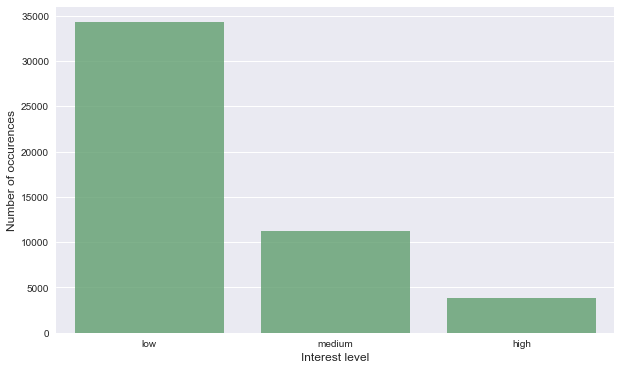

In [6]:
plt.figure(figsize=(10,6))

sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])

plt.ylabel("Number of occurences", fontsize=12)

plt.xlabel('Interest level', fontsize=12)

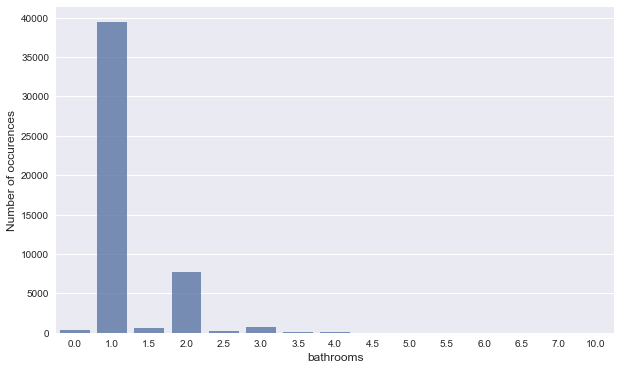

In [7]:
#Exploring the feature bathroom

count_srs= train_df['bathrooms'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(count_srs.index, count_srs.values,alpha=0.8, color=color[0])

plt.xlabel('bathrooms', fontsize=12)
plt.ylabel('Number of occurences', fontsize=12)


/Users/krutarthmajithia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


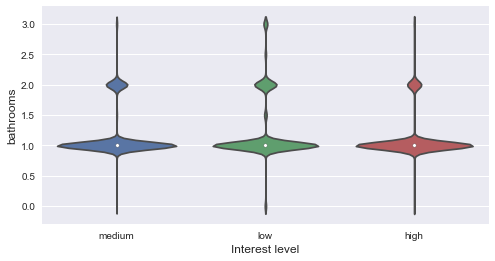

In [8]:
train_df['bathrooms'].loc[train_df['bathrooms']>3]=3

plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)

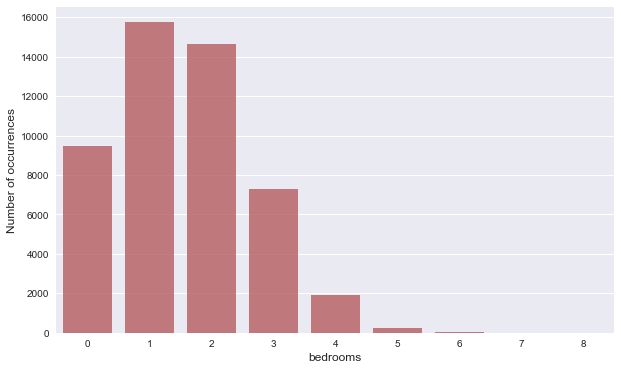

In [9]:
#Exploring the bedrooms

count_srs= train_df['bedrooms'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(count_srs.index, count_srs.values, alpha=0.8, color=color[2])

plt.xlabel('bedrooms', fontsize=12)
plt.ylabel('Number of occurrences', fontsize=12)

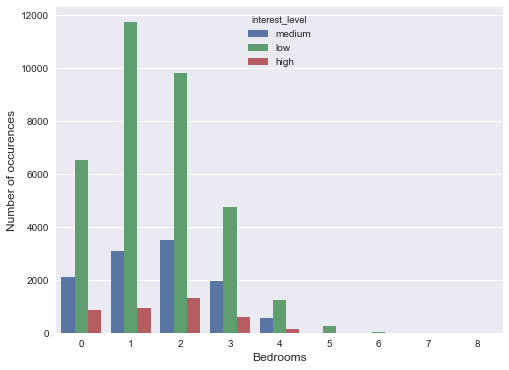

In [10]:
plt.figure(figsize=(8,6))

sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of occurences', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)


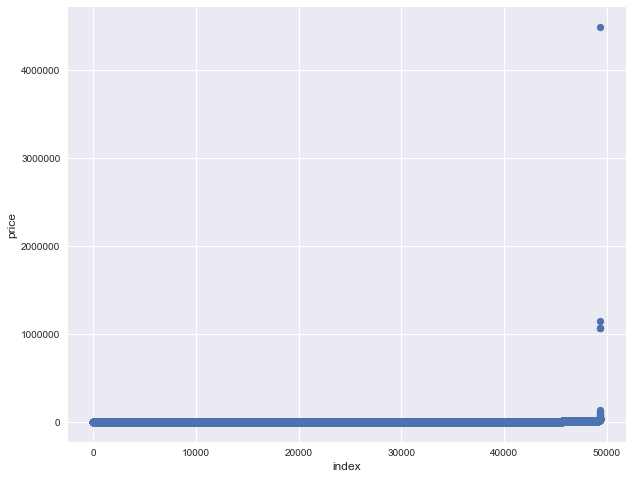

In [11]:
#Now we explore the Price feature

plt.figure(figsize=(10,8))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.ylabel('price',fontsize=12)
plt.xlabel('index', fontsize=12)

/Users/krutarthmajithia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


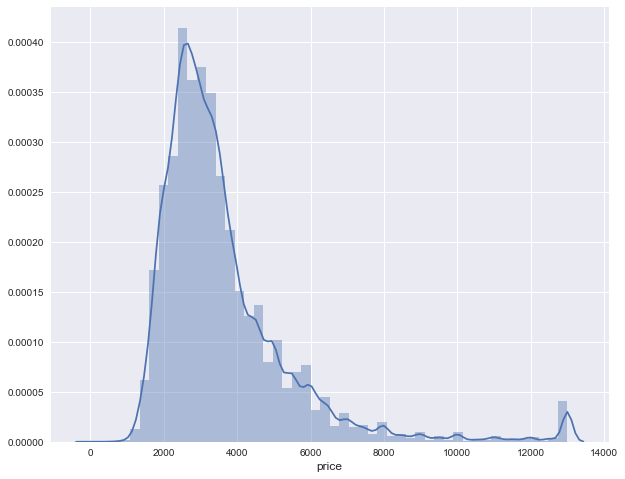

In [12]:
#From the graph we see some outliers. Hence we will remove these outliers
#First we determine the 99th percentile of the price values

ulimit= np.percentile(train_df.price.values, 99)
train_df['price'].loc[train_df['price']>ulimit]=ulimit

plt.figure(figsize=(10,8))

sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel("price", fontsize=12)


/Users/krutarthmajithia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


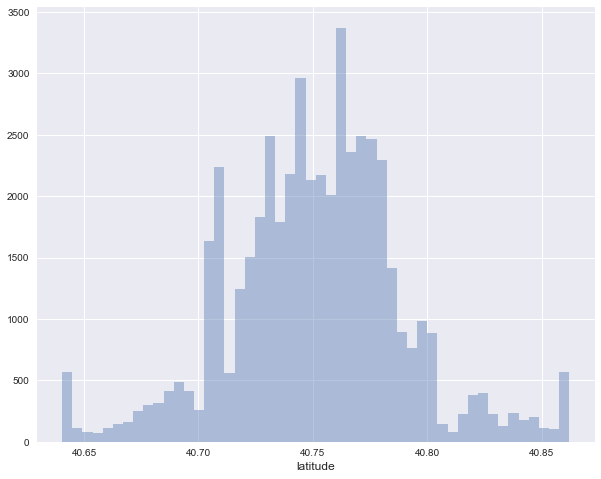

In [13]:
# Now we will explore the Latitude and the Longitude values.

llimit= np.percentile(train_df.latitude.values,1)
ulimit= np.percentile(train_df.latitude.values,99)

train_df['latitude'].loc[train_df['latitude']<llimit]=llimit
train_df['latitude'].loc[train_df['latitude']>ulimit]=ulimit

plt.figure(figsize=(10,8))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)

/Users/krutarthmajithia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


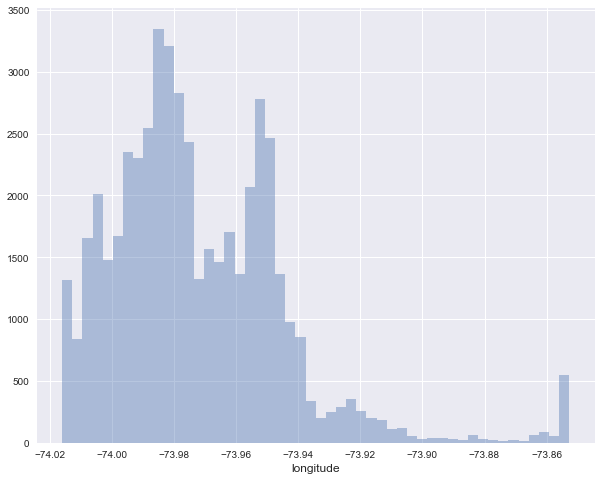

In [14]:
llimit= np.percentile(train_df.longitude.values,1)
ulimit= np.percentile(train_df.longitude.values,99)

train_df['longitude'].loc[train_df['longitude']<llimit]=llimit
train_df['longitude'].loc[train_df['longitude']>ulimit]=ulimit

plt.figure(figsize=(10,8))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)

(array([736064., 736078., 736092., 736106., 736120., 736134., 736148.]),
 <a list of 7 Text xticklabel objects>)

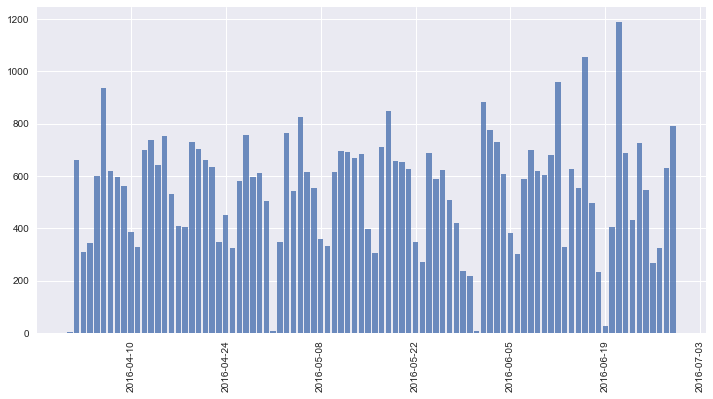

In [15]:
#After checking the numerical features, we explore the date features of the training set and the test set
# to determine whether the data in both the sets are consistent to each other

train_df['created']=pd.to_datetime(train_df['created'])
train_df['date_created']= train_df['created'].dt.date

count_srs= train_df['date_created'].value_counts()

plt.figure(figsize=(12,6))
ax=plt.subplot(111)

ax.bar(count_srs.index, count_srs.values, alpha=0.8)

ax.xaxis_date()

plt.xticks(rotation='vertical')




In [16]:
test_df=pd.read_json('/users/krutarthmajithia/downloads/test.json')

In [17]:
test_df.head(10)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street
100001,3.0,3,9d1a51a5df4f0b5650b46da8e5ad6910,2016-04-07 06:14:43,In a boutique prewar building with 24 hour doo...,Wea,"[Fireplace, Dining Room, Doorman, Elevator, La...",40.7901,6840081,-73.9774,964dc31a872efa33fee9af11f62e843c,[https://photos.renthop.com/2/6840081_ec339bca...,9000,575 Wea
100002,1.0,2,80d7355b09295b4c850132f8831f44df,2016-04-25 03:07:55,WHY PAY OTHER BROKERS 15% FOR A GREAT APARTMEN...,E 78th St.,"[Hardwood Floors, New Construction]",40.7730,6922337,-73.9571,4f9b376a972b863bbfbdcdc8d717fa4e,[https://photos.renthop.com/2/6922337_bb9a16ba...,2800,220 E 78th St.
100003,1.0,0,0,2016-04-22 06:13:49,- Spectacular renovated studio in restored tow...,Saint Marks Ave,"[Fireplace, Pre-War, Laundry in Building, Dish...",40.6751,6913616,-73.9511,0cef44deaab7ace783c77a061c043c2b,[https://photos.renthop.com/2/6913616_9e32fc00...,1900,678 Saint Marks Ave
100005,1.0,2,408d54e3447c52bb06a3f882b4d1d8c3,2016-04-28 05:32:45,Beautiful 2Br apartment with Cherry hardwood f...,West 43rd Street,"[Dogs Allowed, Cats Allowed]",40.7597,6937820,-73.9929,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6937820_9ce4de26...,3000,417-419 West 43rd Street
100006,1.0,0,7c25a2db9e96160f1441808896eb403a,2016-04-19 03:25:02,Hardwood Floors<br/><br/>EXPOSED BRICK<br/><br...,Orchard Street,"[Loft, Hardwood Floors]",40.7208,6893933,-73.9887,18464b5400971c49bfd12a59c5477174,[https://photos.renthop.com/2/6893933_29727269...,2300,154 Orchard Street


(array([736064., 736078., 736092., 736106., 736120., 736134., 736148.]),
 <a list of 7 Text xticklabel objects>)

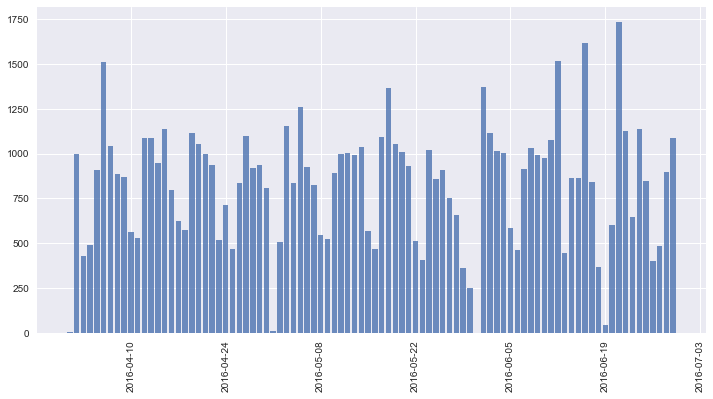

In [18]:
test_df['created']=pd.to_datetime(test_df['created'])
test_df['date_created']= test_df['created'].dt.date

count_srs= test_df['date_created'].value_counts()

plt.figure(figsize=(12,6))
ax=plt.subplot(111)

ax.bar(count_srs.index, count_srs.values, alpha=0.8)

ax.xaxis_date()

plt.xticks(rotation='vertical')

Display address that appears less than 2 times : 63.22%
Display address that appears less than 10 times : 89.6%
Display address that appears less than 50 times : 97.73%
Display address that appears less than 100 times : 99.26%
Display address that appears less than 500 times : 100.0%


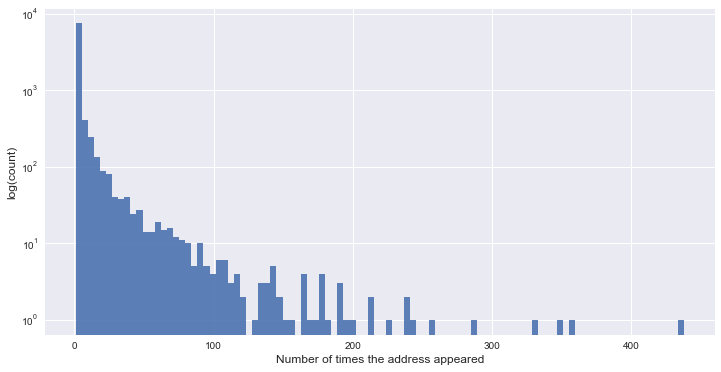

In [19]:
# Now we come to the exploration of the categorical variables (Display adress)

count_srs= train_df.groupby('display_address')['display_address'].count()

for i in [2,10,50,100,500]:
    print("Display address that appears less than {} times : {}%".format(i, round((count_srs<i).mean()*100,2)))
    
plt.figure(figsize=(12,6))

plt.hist(count_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel("Number of times the address appeared", fontsize=12)
plt.ylabel("log(count)", fontsize=12)

In [20]:
import xgboost as xgb
from sklearn import preprocessing, cross_validation, ensemble, model_selection

/Users/krutarthmajithia/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [35]:
#Now we will be writing a custom function to run the xgboost model
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model
    
    

In [23]:
#Here we create a list of features to use
features_to_use=['bathrooms','bedrooms', 'latitude', 'longitude', 'price']

Here we will be creating new features from the given features

In [25]:
train_df['num_photos'] = train_df['photos'].apply(len)
test_df['num_photos'] = test_df['photos'].apply(len)

train_df['num_features'] = train_df['features'].apply(len)
test_df['num_features'] = test_df['features'].apply(len)

train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_description_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])


train_df["created_year"] = train_df["created"].dt.year
test_df["created_year"] = test_df["created"].dt.year
train_df["created_month"] = train_df["created"].dt.month
test_df["created_month"] = test_df["created"].dt.month
train_df["created_day"] = train_df["created"].dt.day
test_df["created_day"] = test_df["created"].dt.day
train_df["created_hour"] = train_df["created"].dt.hour
test_df["created_hour"] = test_df["created"].dt.hour

# adding all these new features to use list #
features_to_use.extend(["num_photos", "num_features", "num_description_words","created_year",
                        "created_month", "created_day", "listing_id", "created_hour"])

Now there are four categorical features in the dataset. We will use label encoder for all for of them

In [26]:
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if train_df[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_df[f].values) + list(test_df[f].values))
            train_df[f] = lbl.transform(list(train_df[f].values))
            test_df[f] = lbl.transform(list(test_df[f].values))
            features_to_use.append(f)

In [27]:
train_df['features'] = train_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
test_df['features'] = test_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
print(train_df["features"].head())
tfidf = CountVectorizer(stop_words='english', max_features=200)
tr_sparse = tfidf.fit_transform(train_df["features"])
te_sparse = tfidf.transform(test_df["features"])

10                                                         
10000     Doorman Elevator Fitness_Center Cats_Allowed D...
100004    Laundry_In_Building Dishwasher Hardwood_Floors...
100007                               Hardwood_Floors No_Fee
100013                                              Pre-War
Name: features, dtype: object


In [32]:
train_X = sparse.hstack([train_df[features_to_use], tr_sparse]).tocsr()
test_X = sparse.hstack([test_df[features_to_use], te_sparse]).tocsr()

target_num_map = {'high':0, 'medium':1, 'low':2}
train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))
print(train_X.shape, test_X.shape)

(49352, 217) (74659, 217)


In [36]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train_X.shape[0])):
        dev_X, val_X = train_X[dev_index,:], train_X[val_index,:]
        dev_y, val_y = train_y[dev_index], train_y[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

[0]	train-mlogloss:1.04114	test-mlogloss:1.04219
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:0.988799	test-mlogloss:0.990721
[2]	train-mlogloss:0.944048	test-mlogloss:0.94691
[3]	train-mlogloss:0.90518	test-mlogloss:0.908812
[4]	train-mlogloss:0.8718	test-mlogloss:0.876215
[5]	train-mlogloss:0.841498	test-mlogloss:0.847057
[6]	train-mlogloss:0.815614	test-mlogloss:0.821795
[7]	train-mlogloss:0.79312	test-mlogloss:0.799993
[8]	train-mlogloss:0.773194	test-mlogloss:0.780815
[9]	train-mlogloss:0.754598	test-mlogloss:0.763247
[10]	train-mlogloss:0.738162	test-mlogloss:0.747594
[11]	train-mlogloss:0.724634	test-mlogloss:0.734739
[12]	train-mlogloss:0.711331	test-mlogloss:0.722318
[13]	train-mlogloss:0.699821	test-mlogloss:0.711481
[14]	train-mlogloss:0.689142	test-mlogloss:0.701381
[15]	train-mlogloss:0.678446	test-mlogloss:0.691482
[16]	train-mlogloss:0.669268	test-

[155]	train-mlogloss:0.454117	test-mlogloss:0.558296
[156]	train-mlogloss:0.453326	test-mlogloss:0.558084
[157]	train-mlogloss:0.452753	test-mlogloss:0.557905
[158]	train-mlogloss:0.452359	test-mlogloss:0.557868
[159]	train-mlogloss:0.451707	test-mlogloss:0.557636
[160]	train-mlogloss:0.451068	test-mlogloss:0.557454
[161]	train-mlogloss:0.450408	test-mlogloss:0.557361
[162]	train-mlogloss:0.449685	test-mlogloss:0.557289
[163]	train-mlogloss:0.448961	test-mlogloss:0.557146
[164]	train-mlogloss:0.448501	test-mlogloss:0.557029
[165]	train-mlogloss:0.447691	test-mlogloss:0.556853
[166]	train-mlogloss:0.446992	test-mlogloss:0.556806
[167]	train-mlogloss:0.446296	test-mlogloss:0.556598
[168]	train-mlogloss:0.445686	test-mlogloss:0.556577
[169]	train-mlogloss:0.444956	test-mlogloss:0.556382
[170]	train-mlogloss:0.444435	test-mlogloss:0.556329
[171]	train-mlogloss:0.443592	test-mlogloss:0.556008
[172]	train-mlogloss:0.442805	test-mlogloss:0.555822
[173]	train-mlogloss:0.442412	test-mlogloss:0.

[311]	train-mlogloss:0.370729	test-mlogloss:0.548765
[312]	train-mlogloss:0.37032	test-mlogloss:0.548888
[313]	train-mlogloss:0.369891	test-mlogloss:0.548985
[314]	train-mlogloss:0.369316	test-mlogloss:0.548926
[315]	train-mlogloss:0.368816	test-mlogloss:0.548971
[316]	train-mlogloss:0.368333	test-mlogloss:0.548876
[317]	train-mlogloss:0.368004	test-mlogloss:0.548885
[318]	train-mlogloss:0.367705	test-mlogloss:0.548927
[319]	train-mlogloss:0.367121	test-mlogloss:0.548788
[320]	train-mlogloss:0.366641	test-mlogloss:0.548706
[321]	train-mlogloss:0.366203	test-mlogloss:0.548571
[322]	train-mlogloss:0.365932	test-mlogloss:0.548489
[323]	train-mlogloss:0.365446	test-mlogloss:0.548531
[324]	train-mlogloss:0.365172	test-mlogloss:0.548617
[325]	train-mlogloss:0.364779	test-mlogloss:0.548644
[326]	train-mlogloss:0.364241	test-mlogloss:0.548594
[327]	train-mlogloss:0.363824	test-mlogloss:0.548602
[328]	train-mlogloss:0.3634	test-mlogloss:0.548548
[329]	train-mlogloss:0.363084	test-mlogloss:0.548